# Intro

## 1. Introduction.
   1. To get started, please write 5 examples of the application of ML methods in life. What is the benefit of using machine learning methods in each of your examples? 
   2. Use the classification of tasks in the introduction to decide which class you can assign to the tasks from the table above and to the 5 examples you provided. 
   3. Think about what the difference is between multiclass and multilabel.
   4. Is an example case with house prices from the theory a classification of a regression problem? Is it possible to reduce the regression problem to classification?

1. - предсказание цен на авто (более честные цены продавцов)
   - ранжирование ответов на поисковой запрос в гугл (получение более точного ответа)
   - классификация меланом на доброкачественные и злокачественные
   - уменьшение размеров датасета (более быстрое обучение)
   - рекомендация товаров исходя из предыдущих покупок (повышение продаж)

2. - регрессия
   - ранжирование
   - классификация
   - снижение размерности
   - ассоциация

3. Мультиклассовая классификация предсказвает одно единственное значение, мультилейбл классификация выдает несколько возможных классов

4. Да, это задача регрессии. В задачу классфикации это можно превратить сопоставляя входные данные некоторым ценовым диапазонам (<2 млн, 2-4 млн, ..., >40 млн)

## 2. Introduction to Data Analysis
   1. Import the libraries **pandas**, **numpy**, **sklearn**, **lightgbm**, **scipy**, **statsmodels**, **matplotlib**, **seaborn**. Use **pip install** if necessary.
   2. Load data from [kaggle](https://www.kaggle.com/competitions/two-sigma-connect-rental-listing-inquiries/data) using **pandas**. You only need the table data, which is in **train.json**.
   3. What is the size (the number of rows and columns) of your data? 
   4. Print the list of columns. Which column is a target? 
   5. Make a quick analysis of the data: use the methods **info()**, **describe()**, **corr()**. Explain the results of the outputs. Are there any empty columns? 
   6. We'll work with only 3 features: 'bathrooms', 'bedrooms', 'interest_level' and with the target column 'price'. Create a dataframe with only these columns.


In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgbm
import scipy 
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
!kaggle competitions download -c two-sigma-connect-rental-listing-inquiries

  0%|                                                | 0.00/112M [00:00<?, ?B/s]
100%|████████████████████████████████████████| 112M/112M [00:00<00:00, 1.61GB/s]


In [2]:
df = pd.read_json("data/train.json")
df.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium


In [3]:
df.shape

(49352, 15)

In [4]:
df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

target column - price

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [6]:
print(df.describe())

         bathrooms      bedrooms      latitude    listing_id     longitude  \
count  49352.00000  49352.000000  49352.000000  4.935200e+04  49352.000000   
mean       1.21218      1.541640     40.741545  7.024055e+06    -73.955716   
std        0.50142      1.115018      0.638535  1.262746e+05      1.177912   
min        0.00000      0.000000      0.000000  6.811957e+06   -118.271000   
25%        1.00000      1.000000     40.728300  6.915888e+06    -73.991700   
50%        1.00000      1.000000     40.751800  7.021070e+06    -73.977900   
75%        1.00000      2.000000     40.774300  7.128733e+06    -73.954800   
max       10.00000      8.000000     44.883500  7.753784e+06      0.000000   

              price  
count  4.935200e+04  
mean   3.830174e+03  
std    2.206687e+04  
min    4.300000e+01  
25%    2.500000e+03  
50%    3.150000e+03  
75%    4.100000e+03  
max    4.490000e+06  


In [7]:
print(df.corr(numeric_only=True))

            bathrooms  bedrooms  latitude  listing_id  longitude     price
bathrooms    1.000000  0.533446 -0.009657    0.000776   0.010393  0.069661
bedrooms     0.533446  1.000000 -0.004745    0.011968   0.006892  0.051788
latitude    -0.009657 -0.004745  1.000000    0.001712  -0.966807 -0.000707
listing_id   0.000776  0.011968  0.001712    1.000000  -0.000907  0.008090
longitude    0.010393  0.006892 -0.966807   -0.000907   1.000000 -0.000087
price        0.069661  0.051788 -0.000707    0.008090  -0.000087  1.000000


нет null значений, всего 3 float64, 3 int64 и 9 object колонок  
цена варьируется от 3800 до 4500000  
есть сильная обратная корреляция между longitude и latitude
c target переменной все корреляции слабые

In [8]:
df = df[['bathrooms', 'bedrooms', 'interest_level', 'price']]

## 3. Statistical Data Analysis
   1. To get started with statistical data analysis, we recommend that you refresh your basic knowledge of statistics, such as Mean / Median / Mode / Variance / Standard Deviation. Also you are welcome to be free with distributions (Discrete uniform Distribution, Bernoulli Distribution, Binomial Distribution, Poisson Distribution, Normal Distribution, Exponential Distribution). Please make sure that you know the definitions of outliers, percentiles, confidential intervals. The article will be presented later. 
   2. Have a quick look at [this article](https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf). Please pay attention to such aspects as distributions and histograms, boxplots, outliers, kernel density function.
   3. Target analysis
      1. Plot a histogram to understand the distribution of the target. Is it all clear? 
      2. The next step is boxplot(). What can you say about the target? Are there any outliers? 
      3. Drop the rows that are outside the 1 and 99 percentiles from the target column. 
      4. Plot another histogram for price. Explain the result.



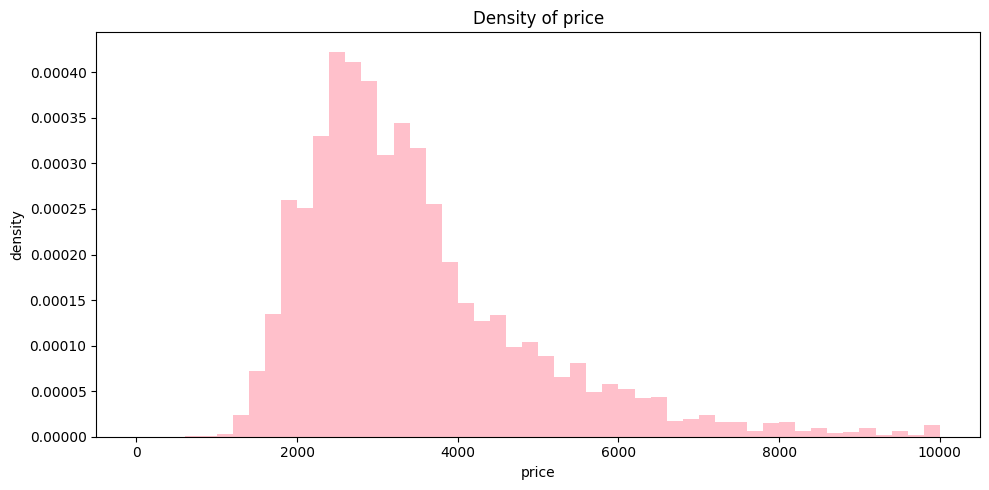

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(df['price'], color='pink', density=True, range=(0, 10000), bins=50)
plt.title('Density of price')
plt.xlabel('price')
plt.ylabel('density')
plt.tight_layout()
plt.show()

справа хвост оооооочень длинный  
пришлось ограничить x чтобы график не был 1 палкой

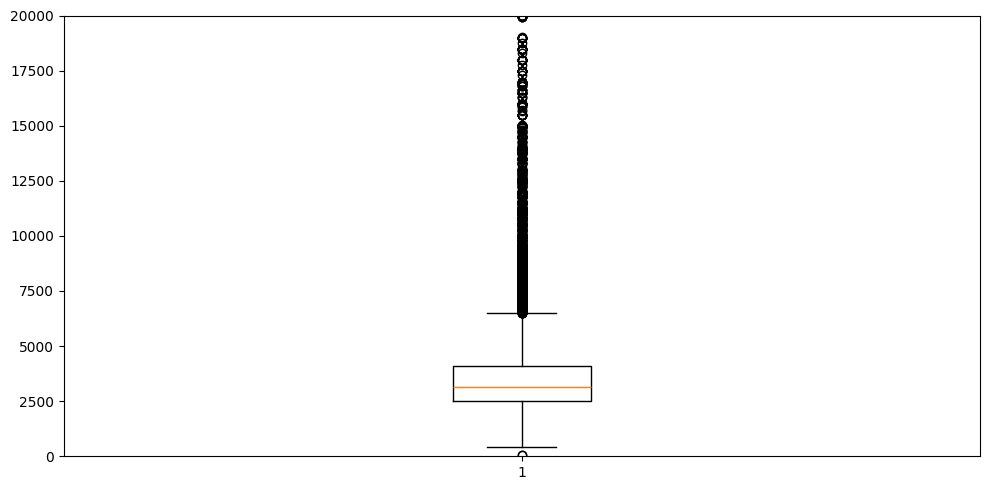

In [12]:
plt.figure(figsize=(10, 5))
plt.boxplot(df['price'])
plt.ylim(0, 20000)
plt.tight_layout()
plt.show()

опять-таки серия выбросов при больших ценах

In [79]:
treshold_upper = df['price'].quantile(0.99)
treshold_lower = df['price'].quantile(0.01)

df = df[(df['price'] < treshold_upper) & (df['price'] > treshold_lower)]

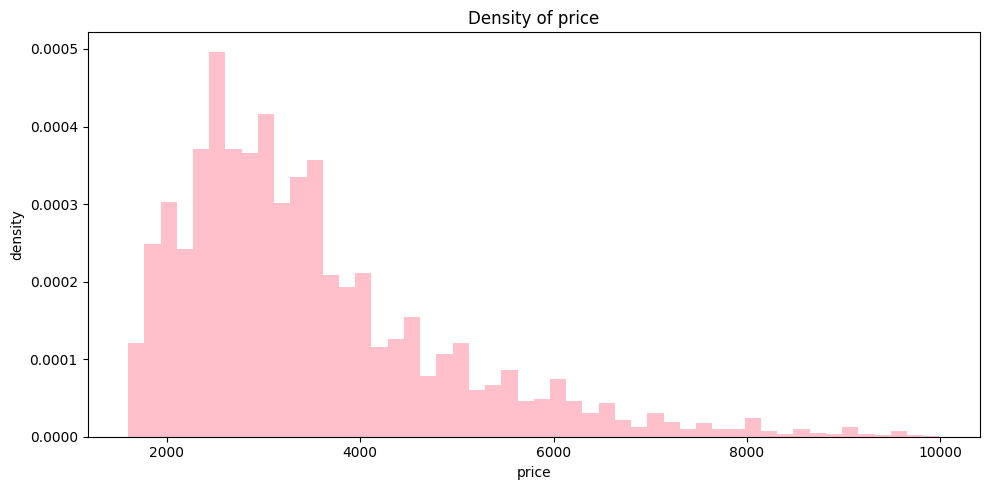

In [80]:
plt.figure(figsize=(10, 5))
plt.hist(df['price'], color='pink', density=True, bins=50)
plt.title('Density of price')
plt.xlabel('price')
plt.ylabel('density')
plt.tight_layout()
plt.show()

теперь график (без ограничения x) выглядит хорошо, но по прежнему видно что много значений очень далеко от среднего

   4. Characteristics Analysis
      1. What is the type of column 'interest_level'? 
      2. Print the values in this column. How many entries does each value contain? 
      3. Encode these values. For example, you can replace each value with 0, 1, or 2.
      4. Plot histograms for the features 'bathrooms', 'bedrooms'. Are there any outliers?

In [13]:
df['interest_level'].dtype

dtype('O')

тип - object

In [14]:
df['interest_level'].value_counts()

interest_level
low       34284
medium    11229
high       3839
Name: count, dtype: int64

In [83]:
# кодирование сделаю двумя способами для своей тренировки
df_copy = df.copy()
df_copy.loc[df['interest_level'] == 'low', 'interest_level'] = 0
df_copy.loc[df['interest_level'] == 'medium', 'interest_level'] = 1
df_copy.loc[df['interest_level'] == 'high', 'interest_level'] = 2
df_copy['interest_level'].value_counts()

interest_level
1    32966
2    10932
0     3353
Name: count, dtype: int64

In [84]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['interest_level'] = encoder.fit_transform(df['interest_level'])

In [85]:
df['interest_level'].value_counts()

interest_level
1    32966
2    10932
0     3353
Name: count, dtype: int64

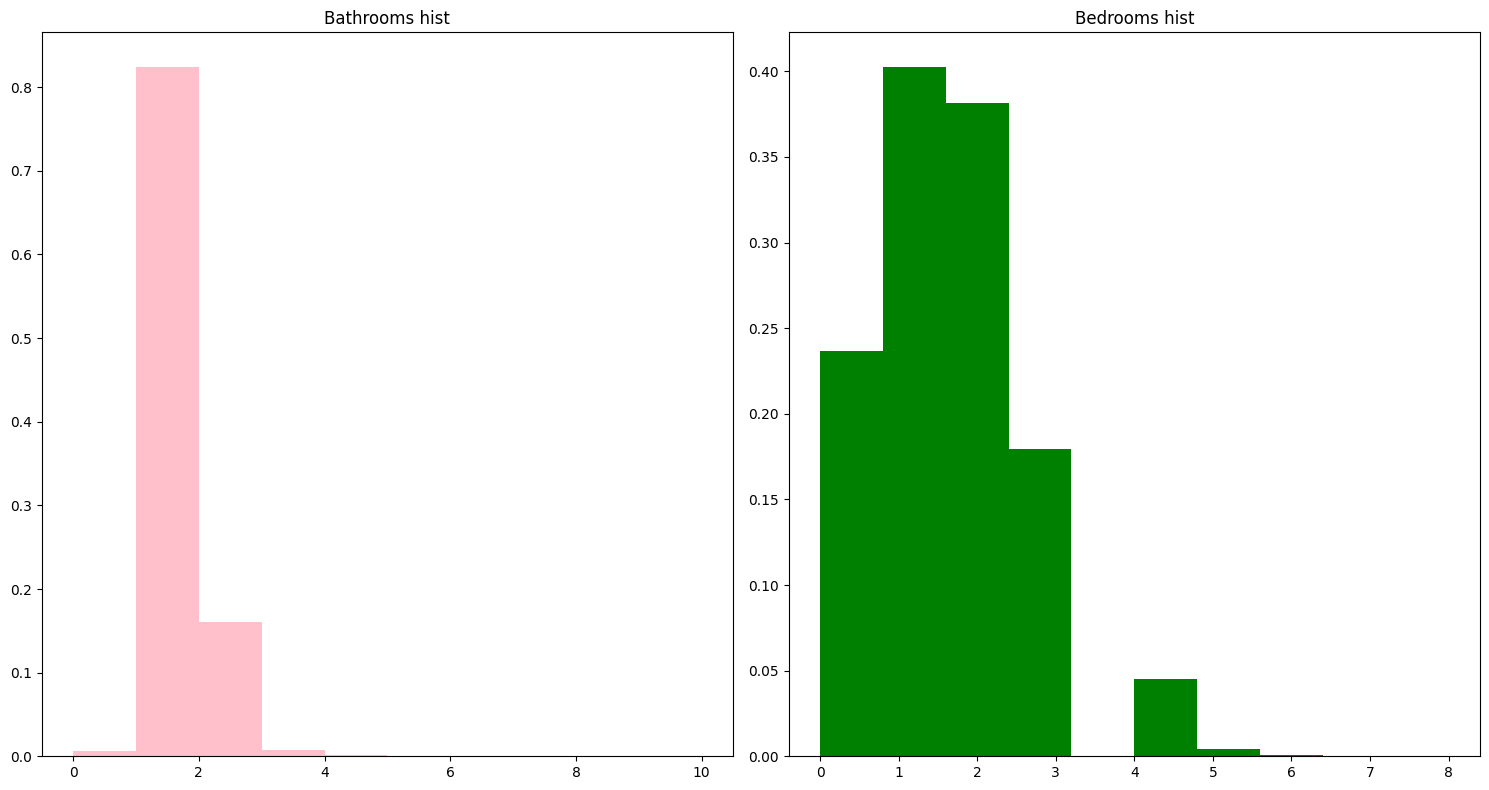

In [98]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].hist(df['bathrooms'], density=True, color='pink')
axs[0].set_title('Bathrooms hist')
axs[1].hist(df['bedrooms'], density=True, color='green')
axs[1].set_title('Bedrooms hist')
plt.tight_layout()
plt.show()

нет заметных выбросов

   5. Complex analysis
      1. Plot a correlation matrix to understand the correlation between features and target. Plot a heat map for the correlation matrix. Is there a correlation? 
      2. Plot a scatterplot to visualize the correlation between the features and the target. You should return 3 plots where the X-axis is the target and the Y-axis is a feature.

In [99]:
df.corr()

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.502491,0.001462,0.630445
bedrooms,0.502491,1.000000,0.031808,0.550800
interest_level,0.001462,0.031808,1.000000,-0.030058
price,0.630445,0.550800,-0.030058,1.000000


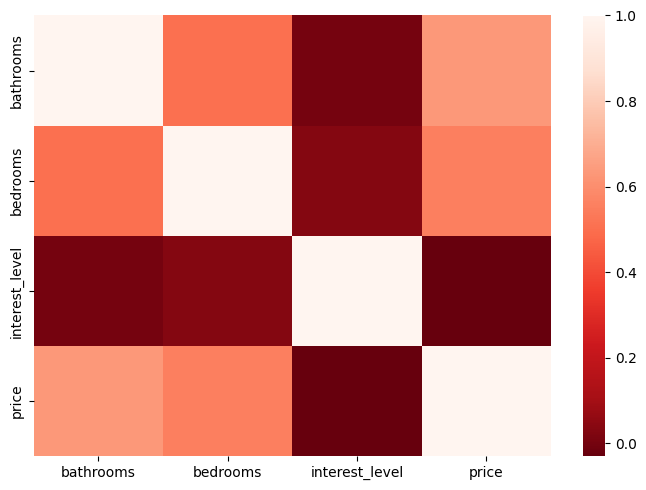

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), cmap='Reds_r')
plt.tight_layout()
plt.show()

сильнее всего корреляция с bathrooms

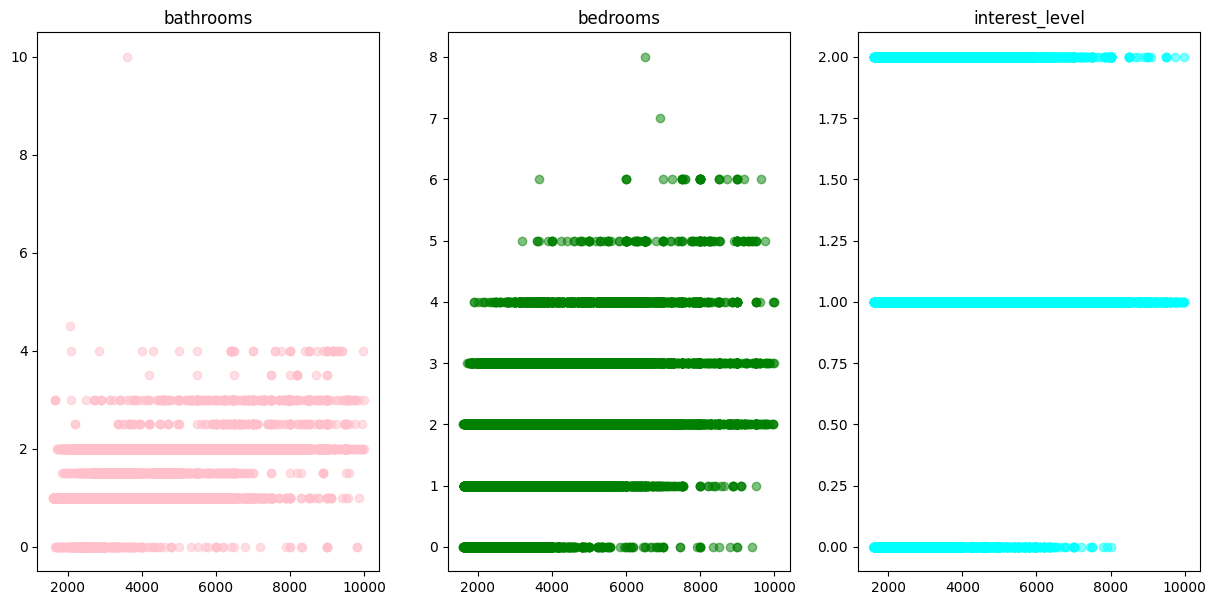

In [151]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

axs[0].scatter(df['price'], df['bathrooms'], c='pink', alpha=0.5)
axs[0].set_title('bathrooms')
axs[1].scatter(df['price'], df['bedrooms'], c='green', alpha=0.5)
axs[1].set_title('bedrooms')
axs[2].scatter(df['price'], df['interest_level'], c='cyan', alpha=0.5)
axs[2].set_title('interest_level')

plt.show()

## 4. Creating Features
   1. This step is very broad. You can create as many features as you want. For example, you can add 3 new features that are squared: 'bathrooms_squared', 'bedrooms_squared', ''interest_level_squared'. Plot a correlation matrix with the new features. Are the new features more correlated with the target than the basic features? 
   2. To train the model here, we will not use your new features. Remember this example and use it in Lecture 2. To train the model, we will only consider the features 'bathrooms' and 'bedrooms'.
   3. Read this [Sklearn info about PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).
   4. To use PolynomialFeatures, we first need to split the data into training and test samples. We have already done this for you, please read the training and test data. 
   5. Initialize PolynomialFeatures() with a degree of 10. 
   6. Apply PolynomialFeatures() to fit and transform your training and test data.


In [154]:
df['bathrooms_squared'] = df['bathrooms'].map(lambda x : x*x)
df['bedrooms_sqared'] = df['bedrooms'].map(lambda x : x*x)
df['interest_level_sqared'] = df['interest_level'].map(lambda x : x*x)

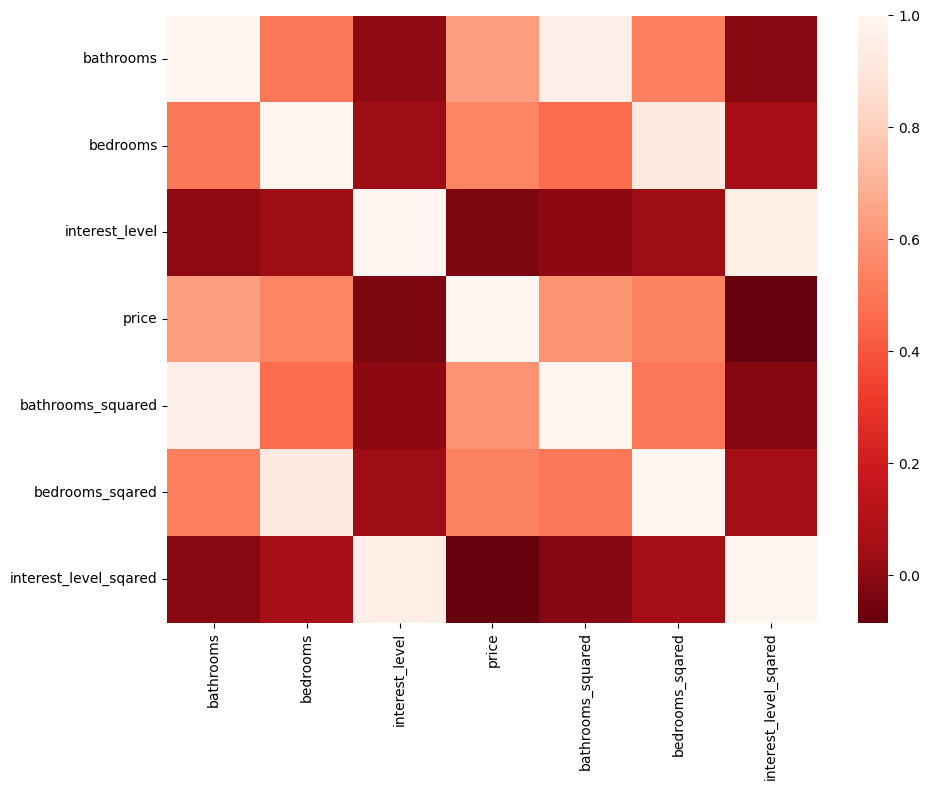

In [157]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='Reds_r')
plt.tight_layout()
plt.show()

коррелирует примерно так же как и параметры, не возведенные в квадрат

In [161]:
train = df[['bathrooms', 'bedrooms', 'price']]
test = pd.read_json("data/test.json")

X_train = df[['bathrooms', 'bedrooms']]
y_train = df['price']

X_test = test[['bathrooms', 'bedrooms']]
y_test = test['price']

In [162]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(10)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

## 5. Now you need to train 3 models: linear regression, decision tree and naive model. We will use them as black boxes without deep understanding. 
   1. Results table 
      1. Create two empty Pandas DataFrames with columns 'model', 'train', 'test'. Let's call the first one result_MAE and the second one result_RMSE. We will fill these tables with the results of the models.


In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [189]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

   2. Linear Regression 
      1. Initialize linear regression from **sklearn** with no parameters. 
      2. Fit your model and make predictions on training and test features. Save it as new columns in data.
      3. Compute MAE (Mean Absolute Error) on training and test targets.
      4. Calculate RMSE (Root Mean Square Error) on training and test objectives.
      5. Insert your metrics into tables *result_MAE* and *result_RMSE* with model name 'linear_regression'.


In [190]:
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_train = mean_absolute_error(y_train, lr.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred_lr)

rmse_train = root_mean_squared_error(y_train, lr.predict(X_train))
rmse_test = root_mean_squared_error(y_test, y_pred_lr)

to_append_mae = pd.DataFrame([{
    'model' : 'linear_regression', 
    'train' : mae_train,
    'test' : mae_test
}])
to_append_rmse = pd.DataFrame([{
    'model' : 'linear_regression', 
    'train' : rmse_train,
    'test' : rmse_test
}])

result_MAE = pd.concat([result_MAE, to_append_mae], ignore_index=True)
result_RMSE = pd.concat([result_RMSE, to_append_rmse], ignore_index=True)

/tmp/ipykernel_9739/292433213.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_MAE = pd.concat([result_MAE, to_append_mae], ignore_index=True)
/tmp/ipykernel_9739/292433213.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_RMSE = pd.concat([result_RMSE, to_append_rmse], ignore_index=True)


   3. Decision Tree
      1. Initialize decision tree regressor from sklearn with fixed random_state=21.
      2. Fit it to train features and train target and make prediction on train and test features. Save it as a new column in data. 
      3. Compute MAE (Mean Absolute Error) on train and test targets.
      4. Compute RMSE (Root Mean Square Error) on train and test targets.
      5. Insert your metrics into tables *result_MAE* and *result_RMSE* with model name 'decision_tree'.

In [191]:
tree = DecisionTreeRegressor(random_state=21).fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

mae_train = mean_absolute_error(y_train, tree.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred_tree)

rmse_train = root_mean_squared_error(y_train, tree.predict(X_train))
rmse_test = root_mean_squared_error(y_test, y_pred_tree)

to_append_mae = pd.DataFrame([{
    'model' : 'decision_tree', 
    'train' : mae_train,
    'test' : mae_test
}])
to_append_rmse = pd.DataFrame([{
    'model' : 'decision_tree', 
    'train' : rmse_train,
    'test' : rmse_test
}])

result_MAE = pd.concat([result_MAE, to_append_mae], ignore_index=True)
result_RMSE = pd.concat([result_RMSE, to_append_rmse], ignore_index=True)

   4. Naive Models
      1. Calculate the mean and median of 'price' on the training and test data and create a column with these values. 
      2. Calculate the MAE on the training and test targets between your target and the calculated mean and median. 
      3. Calculate the RMSE on the training and test targets between your target and the calculated mean and median. 
      4. Insert your metrics into tables result_MAE and result_RMSE with model names 'naive_mean' and 'naive_median'.

In [195]:
mean_train = [y_train.mean()]*len(train)
mean_test = [y_test.mean()]*len(test)
median_train = [y_train.median()]*len(train)
median_test = [y_test.median()]*len(test)

mae_to_append = pd.DataFrame({
    'model' : ['mean', 'median'],
    'train' : [mean_absolute_error(y_train, mean_train), mean_absolute_error(y_train, median_train)],
    'test' : [mean_absolute_error(y_test, mean_test), mean_absolute_error(y_test, median_test)]
})

rmse_to_append = pd.DataFrame({
    'model' : ['mean', 'median'],
    'train' : [root_mean_squared_error(y_train, mean_train), root_mean_squared_error(y_train, median_train)],
    'test' : [root_mean_squared_error(y_test, mean_test), root_mean_squared_error(y_test, median_test)]
})

result_MAE = pd.concat([result_MAE, mae_to_append], ignore_index=True)
result_RMSE = pd.concat([result_RMSE, rmse_to_append], ignore_index=True)

   5. Compare the results 
      1. Print your final result_MAE and result_RMSE tables. 
      2. Which is the best model?

In [196]:
result_MAE

,model,train,test
0,linear_regression,710.265363,1.594011e+16
1,decision_tree,710.265362,9.726365e+02
2,mean,1042.349194,1.440961e+03
3,median,1003.609193,1.322641e+03


In [197]:
result_RMSE

,model,train,test
0,linear_regression,969.255355,4.355443e+18
1,decision_tree,969.255355,9.606850e+03
2,mean,1380.279853,9.713027e+03
3,median,1419.476165,9.731481e+03


лучшая модель - дерево решений